# Projeto 1 da Disciplina de Teoria e Aplicação de Grafos

## Autor: Leandro Beloti Kornelius - 211020900

A Teoria dos Grafos é uma das bases mais importantes da Ciência da Computação tendo inúmeras aplicações em problemas de otimização, análise de redes, redes sociais, redes de transporte e muito mais. Com foi visto na disciplina, um grafo é composto por vértices (ou nós) e arestas (ou ligações), representando, respectivamente, os elementos e as conexões entre eles.

No contexto das redes sociais, os grafos permitem compreender e quantificar o comportamento dos usuários e suas conexões, possibilitando a análise de influência, centralidade, comunidades e padrões de interação. Através de métricas como grau, centralidade de intermediação, centralidade de proximidade e densidade da rede, é possível identificar usuários mais influentes, grupos coesos e a estrutura geral da rede.

Assim, no contexto do projeto, oferece uma ferramenta analítica que pode auxiliar na tomada de decisões, detecção de padrões e compreensão do impacto das interações entre os indivíduos da rede.

Dessa forma, este projeto visa analisar estruturas de redes sociais, utilizando métricas de grafos. Sendo possível avaliar as influências dos usuários da rede social e potenciais de usuários. Para a implementação deste projeto foi usado este jupyter notebook, o qual foi dividido em cinco sessões principais:

1. Coleta de Dados
2. Contrução do Grafo
3. Extração das Métricas Relevantes do Grafo
4. Visualização das Medidas Extraídas de Forma Explícita
5. Elaboração de um Relatório de Análise do Grafo

## 1. Coleta de Dados:

Para realizar o projeto, fomos instruídos a usar o dataset presente na url <https://snap.stanford.edu/data/egonets-Facebook.html>. Os dados deste site foram coletados de um formulário através de um aplicativo do facebook. O dataset foi anonimizado substituindo os ids dos usuários do facebook para um novo valor para cada usuário. Foram também anonimizadas algumas informações como afiliações políticas. Portanto, podemos ver se dois indivíduos tem a mesma orientação política, mas não conseguimos determinar qual ela é.

No arquivo facebook_combined.txt presente no diretório Data > facebook_combined.txt > facebook_combined.txt há os 4039 usuários representados como nós do grafo os quais estão conectados por arestas não direcionadas. Ou seja, se em uma linha deste arquivo tiver que 1 está conectado a 2 isso significa que 2 também está conectado a 1.

Nossa missão é elaborar uma função que seleciona 2000 nós aleatoriamente e todas suas respectivas arestas.

Com isso, devemos preservar todas as arestas entre os nós selecionados. Ou seja, iremos extrair um subgrafo induzido com 2000 vértices do nosso grafo inicial.

Nesse sentido, vamos iniciar com uma função auxiliar que lê o arquivo e retorna um dicionário em que a chave é o identificador numérico de um vértice e o valor correspondentes são todos vértices os quais a chave tem uma aresta que os conecta com direcionamento.

In [113]:
import pandas as pd


def load_graph_data(file_path: str):
    graph_data = {}
    with open(file_path) as f:
        for line in f:
            origen_v_id, destine_v_id = map(int, line.split())
            if origen_v_id in graph_data:
                graph_data[int(origen_v_id)].append(int(destine_v_id))
            else:
                graph_data[int(origen_v_id)] = [int(destine_v_id)]
            if destine_v_id in graph_data:
                graph_data[int(destine_v_id)].append(int(origen_v_id))
            else:
                graph_data[int(destine_v_id)] = [int(origen_v_id)]
    return graph_data

Essa função recebe o caminho do arquivo que terá os dados acerca das arestas do Grafo. Para cada linha no arquivo, é verificado se o vértice de origem está no dicionário. Caso esteja, é necessário acrescentar o vértice de destino às adjacências do vértice de origem. Caso contrário, tivemos a primeira ocorrência do vértice de origem e criamos uma lista com o primeiro vértice adjacente.

Diante disso, agora precisamos selecionar o subgrafo induzido em que selecionaremos 2000 vértices aleatoriamente deste Grafo. Para isso, usaremos a biblioteca numpy em que vamos gerar um array de 1D contendo 2000 ids entre 0 e 4038.

Com este objetivo em mente a seguinte função auxiliar foi elaborada:

In [114]:
import numpy as np

def generate_2000_random_vs(total_nodes=4039, seed=1788089111):
    rng = np.random.default_rng(seed)
    return rng.choice(total_nodes, size=2000, replace=False)

Para obtenção do subgrafo induzido com os 2000 vértices randomicamente selecionados, nós devemos tratar os dados do Grafo original. Assim, devemos:
* Remover ids e vértices adjacentes não selecionados do dicionário
* Remover vértices adjacentes removidos dos vértices que foram selecionados randômicamente

Contudo, caso já exista o subgrafo induzido gerado, não é necessário gerar um novo, podendo apenas usar o existente.

Sob essa ótica, a função abaixo faz esta implementação com a chamadas das funções para conclusão da primeira etapa. Foram inseridos prints para visualização dos resultados, mas foram comentados para não poluir a saída:

In [115]:
from pathlib import Path

sub_graph_file_path = Path("subgraph.txt")

def generate_sub_graph(graph_data, random_vs):
    if not sub_graph_file_path.exists():
        random_vs = set(random_vs)

        # Creates subgraph
        sub_graph = {
            v: [x for x in adj if x in random_vs]
            for v, adj in graph_data.items() if v in random_vs
        }

        # Saves subgraph
        with open(sub_graph_file_path, "x") as f:
            for v_id, adjs in sub_graph.items():
                for adjacent in adjs:
                    f.write(f"{v_id} {adjacent}\n")

        print("✅ Subgrafo induzido gerado e salvo em 'subgraph.txt'.")
    else:
        print("⚠️ Arquivo com subgrafo induzido já existe. Nenhuma ação foi realizada.")

# Testing the functions implemented:
graph_full_data = load_graph_data("./Data/facebook_combined.txt/facebook_combined.txt")
# print(f"Full graph data dictionary: {graph_full_data}")
random_2000_vs = generate_2000_random_vs()
print("Total gerados:", len(random_2000_vs))
print("Únicos:", len(set(random_2000_vs)))
# print(f"Random vs selected: {random_2000_vs}")
generate_sub_graph(graph_full_data, random_2000_vs)

Total gerados: 2000
Únicos: 2000
✅ Subgrafo induzido gerado e salvo em 'subgraph.txt'.


## 2. Construção do Grafo

Para construção da rede foi instruído o uso do pacote NetworkX o qual a documentação pode ser consultada ao lado <https://networkx.org/documentation/stable/install.html>.

Esta biblioteca permite que nós, a partir de um arquivo, façamos a construção de um grafo, garanta sua conectividade, faça limpezas de arestas, consulte métricas e muito mais.

Assim, a função abaixo constrói o grafo a partir dos 2000 vértices aleatórios gerados na "Etapa 1". Esta função gera dois grafos, uma representação apenas de vértices conectados, ou seja com pelo menos uma aresta incidente e outr que, para os vértices isolados, sem arestas incidentes, é feito uma adição explicita destes nós.

In [116]:
import networkx as nx

def build_graph(file_path, nodes):
    G_conn = nx.read_edgelist(file_path, nodetype=int, create_using=nx.Graph())
    G = nx.read_edgelist(file_path, nodetype=int, create_using=nx.Graph())
    # Adds isolated nodes explicitely
    G.add_nodes_from(nodes)
    print(f"🪩 Grafo com vértices isolados carregado com {G.number_of_nodes()} nós e {G.number_of_edges()} arestas.")
    print(f"🔹 Nós com grau maior do que 0: {len([n for n, d in G.degree() if d != 0])}")
    print(f"🔹 Nós isolados (sem arestas): {len([n for n, d in G.degree() if d == 0])}")
    print(f"🪩 Grafo conectado carregado com {G_conn.number_of_nodes()} nós e {G_conn.number_of_edges()} arestas.")
    return G, G_conn

# Defining the graph from the random 2000 sample
G, G_conn = build_graph("subgraph.txt", random_2000_vs)

🪩 Grafo com vértices isolados carregado com 2000 nós e 21050 arestas.
🔹 Nós com grau maior do que 0: 1987
🔹 Nós isolados (sem arestas): 13
🪩 Grafo conectado carregado com 1987 nós e 21050 arestas.


## 3. Extração das Métricas Relevantes do Grafo

### a) Mapear Comunidades pelo Algoritmo de Louvain

O Algoritmo de Louvain é comumente usado em redes complexas e visa detectar comunidades. Atribuindo uma pontuação de modularidade para cada comunidade, ele quantifica a qualidade de uma atribuição de nós às comunidades. Dessa forma, usando este algoritmo teremos uma rede com:

* Muitas conexões internas dentro de cada grupo
* Poucas conexões externas entre comunidades diferentes

Ou seja, ele busca uma partição ótima do grafo que maximiza a modularidade, métrica que mede a qualidade da divisão do grafo em comunidades.

Diante dessa visão geral, o algoritmo irá ter duas fases: a de otimização local e a de agregação.

Na fase de otimização local, o algoritmo tem inicialmente cada nó em sua própria comunidade. Então, para cada nó, irá tentar mover o próprio para a comunidade de um vizinho caso isso aumente a granularidade. Isso é feito recursivamente até não haver mais formas de aumentar a granularidade.

Já na fase de agregação, as comunidades são agrupadas tornando elas um vértices e retornando a fase prévia.

Este processo ocorre até não haver mais ganho de granularidade.

Para a implementação desta etapa, foi usada a seguinte biblioteca <https://github.com/taynaud/python-louvain> cujo readme descreve como usar o Algoritmo de Louvain para computar a melhor partição.

In [117]:
from community import community_louvain

def louvain_algorithm(graph):
    partition = community_louvain.best_partition(graph)
    modularity_score = community_louvain.modularity(partition, graph)
    number_of_communities = len(set(partition.values()))
    print(f"🔹 Comunidades detectadas: {number_of_communities}")
    print(f"🔹 Modularidade: {modularity_score:.4f}")
    return partition

partition = louvain_algorithm(G)

🔹 Comunidades detectadas: 36
🔹 Modularidade: 0.8316


### b) Medidas de Centralidade

Medidas de centralidade nos ajudam a entender o comportamento de uma rede ou grafo. Podendo nos ajudar a interpretar o tendências dos nós, influência e muito mais. Por conseguinte, faz-se necessário analisar algumas dessas medidas, seu significado e consequências no grafo.

##### Grau de Centralidade

Esta métrica mede quantos vizinhos diretos um nó tem. Pode ser um medidor de popularidade local, quantas conexões o nó tem diretamente. Nós com graus maiores tem mais influência na rede social, por exemplo.

In [118]:
centrality_degree = nx.degree_centrality(G)
# print(centrality_degree)

##### Centralidade de Intermediação

Esta medida avalia quantas vezes um nó aparece em caminhos mais curtos entre pares de nós. Nós que tem esta métrica mais alta indicam que este vértice é importante em rotas de transferência de informações, por exemplo.

Para esta análise, é interessante calcular sobre a maior componente conexa. No nosso caso, G_conn.

In [119]:
betweenness = nx.betweenness_centrality(G_conn, normalized=True)
# print(betweenness)

##### Centralidade de Proximidade

Mede o quão perto um vértices está do restante da rede por meio das distâncias dos caminhos mais curtos. Nesse sentido, é lógico afirmar que nós com maior centralidade de proximidade alcançam outros nós em menos passos, percorrendo menos arestas.

Para este medida, recomenda-se também calcular sob o grafo conectado, G_conn.

In [120]:
closeness = nx.closeness_centrality(G_conn)
# print(closeness)

##### Centralidade de Autovetor

Um vértice tem um alto valor desta medida se está ligado a nós que também são importantes, tem alto valor de centralidade. Ou seja, é um medidor de influência global dos vértices no grafo. É uma medida parecida com o grau de centralidade, contudo considera a estrutura do grafo como um todo uma vez que considera a conectividade a nós influentes.

Também é calculada usualmente em G_conn.

In [121]:
autovetor = nx.eigenvector_centrality(G_conn)
# print(autovetor)

### Resumo da Parte 3

Para fácil visualização dos resultados, foi realizado o seguinte trecho de código que reune a comunidade de cada vértice, se está isolado e as medidas calculadas para cada vértice do grafo randomicamente gerado em um dataframe chamadado metrics.

Para valores/nós fora de G_conn, o valor da métrica será preenchido com 0. Como calculamos o Algoritmo de Louvain com vértices isolados, cada um irá pertencer a sua própria comunidade não precisando fazer um tratamento nesse sentido.

Além disso, é acrescentado tudo o que foi feito na parte 3 do grafo gerado na parte 2.

In [122]:
vs = sorted(random_2000_vs)
metrics = pd.DataFrame({"Vértices": vs})
isolated_nodes = {n for n, d in G.degree() if d == 0}

# Putting additional information (community and bool isolated)
metrics["Comunidade"] = metrics["Vértices"].map(partition).astype(int)
metrics["Isolado"] = metrics["Vértices"].apply(lambda v: v in isolated_nodes)

# Maps values
metrics["Grau de Centralidade"] = metrics["Vértices"].map(centrality_degree).fillna(0)
metrics["Intermediação"] = metrics["Vértices"].map(betweenness).fillna(0)
metrics["Proximidade"] = metrics["Vértices"].map(closeness).fillna(0)
metrics["Autovetor"] = metrics["Vértices"].map(autovetor).fillna(0)

# Attaching part 3 to graph
nx.set_node_attributes(G, partition, "Comunidade")
for _, row in metrics.iterrows():
    node = row["Vértices"]
    G.nodes[node]["Grau de Centralidade"] = row["Grau de Centralidade"]
    G.nodes[node]["Intermediação"] = row["Intermediação"]
    G.nodes[node]["Proximidade"] = row["Proximidade"]
    G.nodes[node]["Autovetor"] = row["Autovetor"]
    G.nodes[node]["Isolado"] = row["Isolado"]

print("Resumo dos Resultados:")
metrics.head(10)

Resumo dos Resultados:


,Vértices,Comunidade,Isolado,Grau de Centralidade,Intermediação,Proximidade,Autovetor
0,0,0,False,0.085043,1.398541e-01,0.303203,0.000239
1,3,0,False,0.003002,1.521989e-06,0.228504,0.000007
2,4,0,False,0.003002,1.014659e-06,0.228504,0.000004
3,7,0,False,0.006003,2.628827e-04,0.240245,0.000195
4,8,0,False,0.002501,1.268324e-07,0.228473,0.000004
5,10,0,False,0.002001,3.623783e-08,0.228443,0.000007
6,11,0,False,0.000500,0.000000e+00,0.228351,0.000003
7,13,0,False,0.008004,2.553302e-06,0.228812,0.000015
8,15,0,False,0.000500,0.000000e+00,0.228351,0.000003
9,16,0,False,0.003502,1.379655e-06,0.228535,0.000004


Em resumo, a etapa 3 forneceu uma visão quantitativa e estrutural do grafo, revelando como os vértices se organizam em comunidades e qual é a importância relativa de cada um dentro da rede analisada.

## Visualização das Medidas Extraídas de Forma Explícita

Para visualização das medidas extraídas na parte 3, iremos usar o layout spring_layout da biblioteca escolhida. Esse layout ajuda a posicionar os vértices de forma agradável, facilitando a visualização de agrupamentos.

Para complementar a visualização também iremos atribuir uma cor para cada comunidade e iremos destacar os cinco vértices com maior medida de centralidade para cada uma das métricas calculadas.

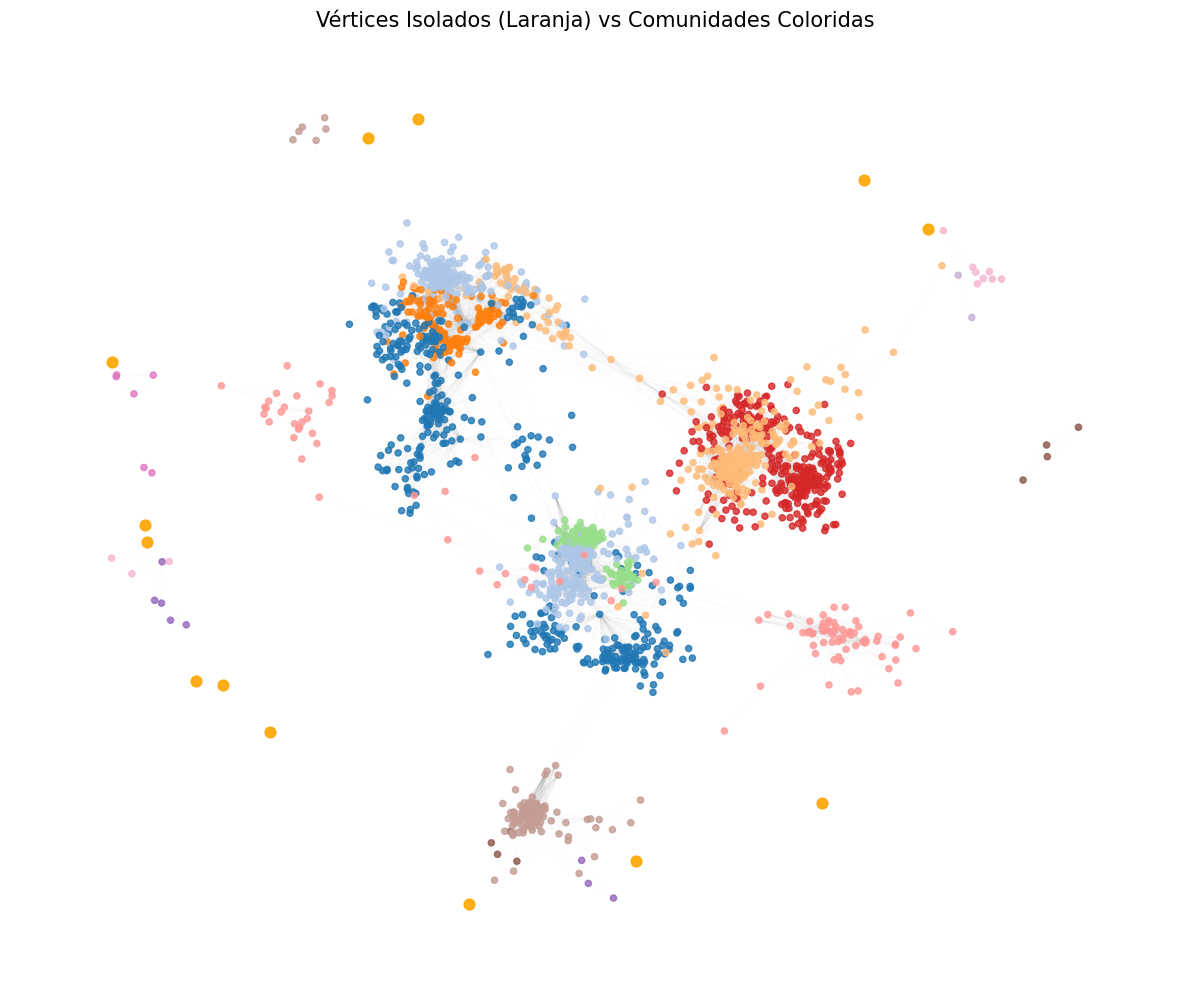

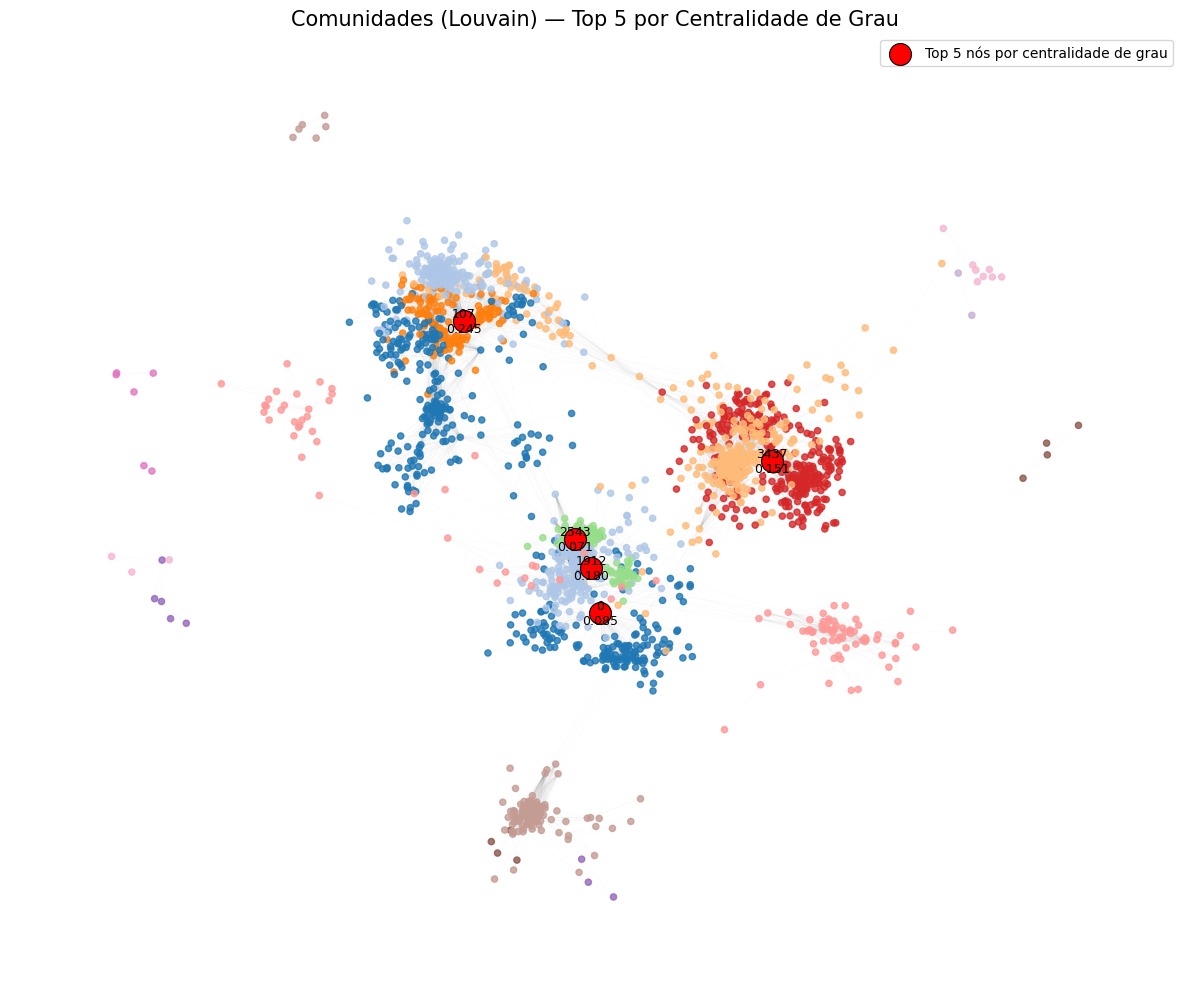

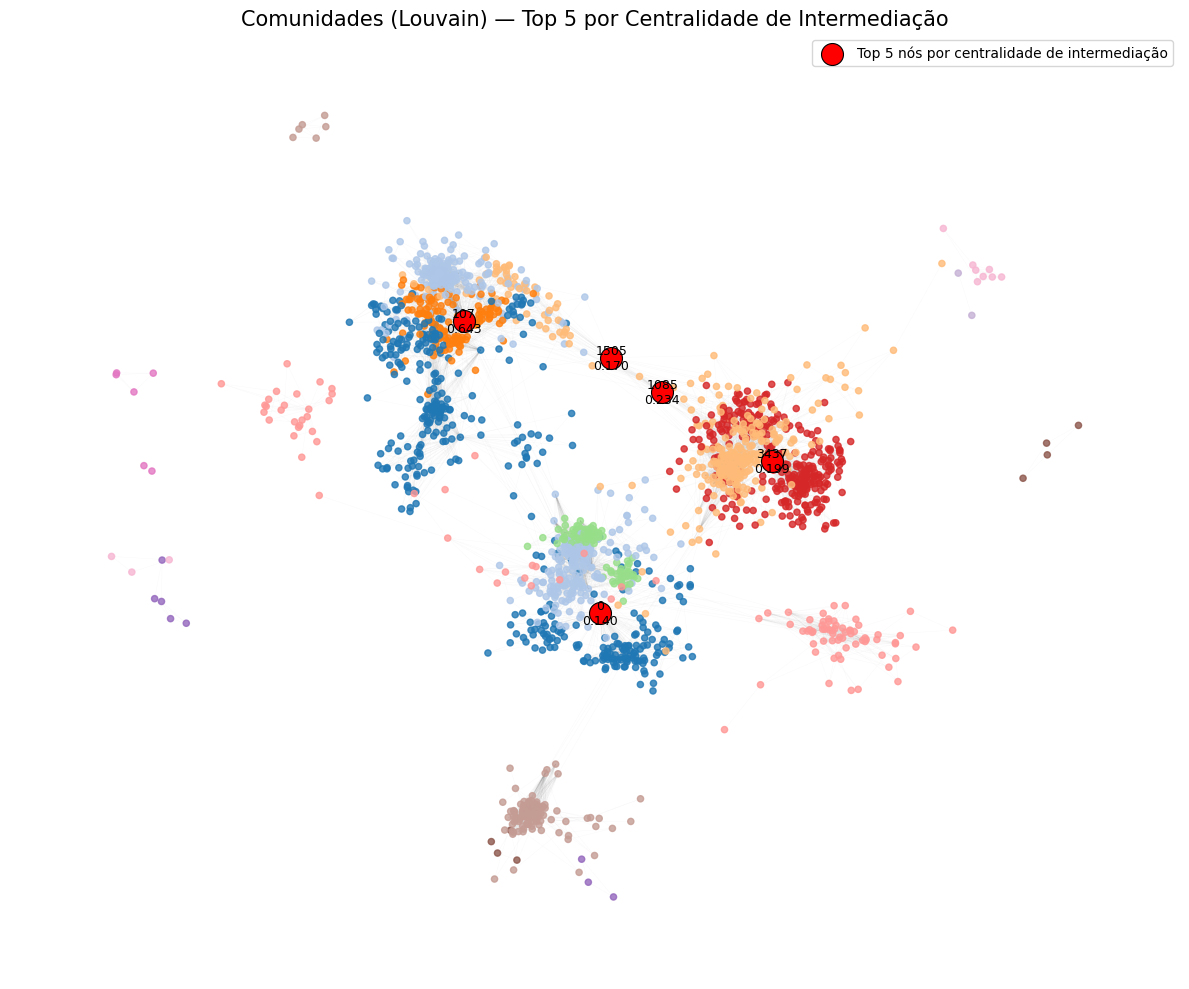

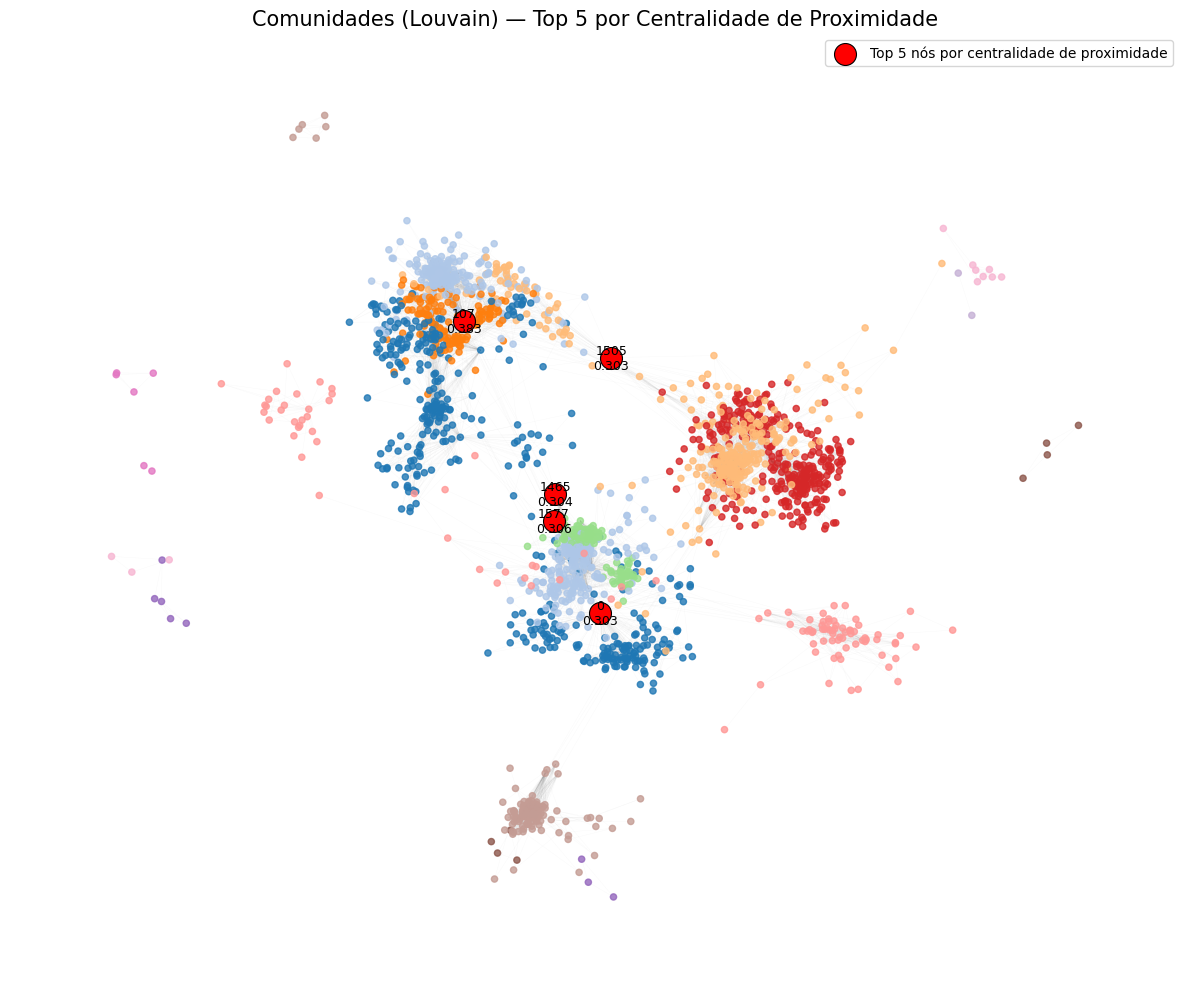

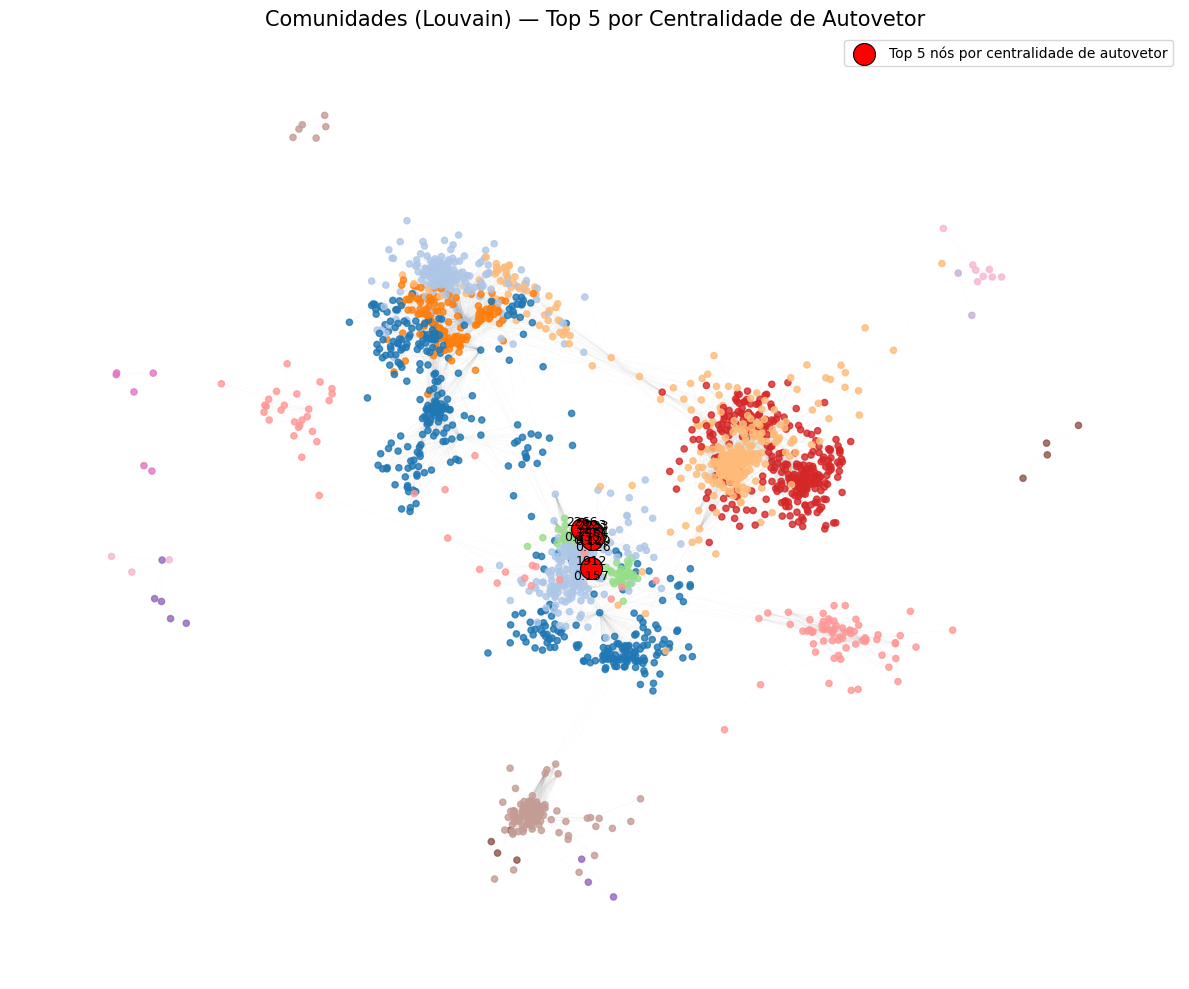

In [123]:
import matplotlib.pyplot as plt
import networkx as nx

SEED = 42

# Layout
pos = nx.spring_layout(G, seed=SEED)

# Community colors
communities = sorted(set(partition.values()))
cmap_com = plt.colormaps.get_cmap('tab20')
color_map = {com: cmap_com(i / len(communities)) for i, com in enumerate(communities)}

# Separates isolated nodes
isolated_nodes = [n for n, d in G.degree() if d == 0]
non_isolated = [n for n in G.nodes() if n not in isolated_nodes]

# Color isolated nodes
cores_non_isolated = [color_map[partition[n]] for n in non_isolated]

# Isolated and Communities
plt.figure(figsize=(12, 10), facecolor="white")
nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3, edge_color="gray")
nx.draw_networkx_nodes(G, pos, nodelist=non_isolated, node_color=cores_non_isolated, node_size=20, alpha=0.8)
nx.draw_networkx_nodes(G, pos, nodelist=isolated_nodes, node_color="orange", node_size=60, alpha=0.9)
plt.title("Vértices Isolados (Laranja) vs Comunidades Coloridas", fontsize=15)
plt.axis("off")
plt.tight_layout()
plt.show()

# Metrics to Plot
data = [
    ("Grau de Centralidade", "Centralidade de Grau"),
    ("Intermediação", "Centralidade de Intermediação"),
    ("Proximidade", "Centralidade de Proximidade"),
    ("Autovetor", "Centralidade de Autovetor")
]

# Graph generation
for col, name in data:
    plt.figure(figsize=(12, 10), facecolor="white")

    # Edges and nodes colored by community
    nx.draw_networkx_edges(G, pos, alpha=0.05, width=0.3, edge_color="gray")
    nx.draw_networkx_nodes(G, pos, nodelist=non_isolated, node_color=cores_non_isolated, node_size=20, alpha=0.8)

    # Top 5
    top_vs = metrics.sort_values(col, ascending=False).head(5)
    nx.draw_networkx_nodes(
        G,
        pos,
        nodelist=top_vs["Vértices"],
        node_size=250,
        node_color="red",
        edgecolors="black",
        linewidths=0.8,
        label=f"Top 5 nós por {name.lower()}"
    )

    # Labels
    labels = {
        int(row["Vértices"]): f"{int(row['Vértices'])}\n{row[col]:.3f}"
        for _, row in top_vs.iterrows()
    }
    nx.draw_networkx_labels(G, pos, labels=labels, font_size=9, font_color="black")

    plt.title(f"Comunidades (Louvain) — Top 5 por {name}", fontsize=15)
    plt.axis("off")
    plt.legend(scatterpoints=1, fontsize=10)
    plt.tight_layout()
    plt.show()

Essa etapa do projeto realiza a visualização do grafo com foco em comunidades e métricas de centralidade. De forma sucinta, ela faz o seguinte:
* Define um layout fixo do grafo (spring_layout com seed=42) para manter a mesma disposição dos nós em todos os gráficos.
* Atribui cores únicas e consistentes para cada comunidade usando o colormap tab20.
* Separa os nós isolados (grau 0) e os destaca em laranja, enquanto os demais nós são coloridos conforme sua comunidade.
* Plota o grafo completo, mostrando:
* Arestas leves e discretas (alpha=0.05, width=0.3)
* Nós das comunidades com tamanho uniforme (node_size=20)
* Nós isolados em destaque (node_size=60, cor laranja)
* Gera gráficos individuais para métricas de centralidade (grau, intermediação, proximidade e autovetor), destacando os top 5 nós de cada métrica em vermelho com rótulos legíveis (número do vértice + valor da métrica).
* Mantém consistência visual: mesmas cores de comunidades, tamanho de nós uniforme, fundo branco e layout fixo em todos os gráficos.